In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Sklearn / Imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Models for Feature Selection & Classification
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             ConfusionMatrixDisplay)

In [3]:
# Load the dataset
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
print("DataFrame shape:", df.shape)
print("\nSample Rows:")
display(df.head())

print("\nInfo:")
df.info()

print("\nChecking for duplicates...")
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

print("\nChecking for null/missing values...")
print(df.isnull().sum())

print("\nStatistical Summary (numerical features):")
display(df.describe(include=[np.number]))

print("\nStatistical Summary (object/categorical features):")
display(df.describe(include=['object']))

DataFrame shape: (1470, 35)

Sample Rows:


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel         

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]


Statistical Summary (object/categorical features):


Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [5]:
df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], inplace=True)
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [6]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values. Example: {unique_vals[:10]}")
    print("-"*50)

Age: 43 unique values. Example: [41 49 37 33 27 32 59 30 38 36]
--------------------------------------------------
Attrition: 2 unique values. Example: ['Yes' 'No']
--------------------------------------------------
BusinessTravel: 3 unique values. Example: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------
DailyRate: 886 unique values. Example: [1102  279 1373 1392  591 1005 1324 1358  216 1299]
--------------------------------------------------
Department: 3 unique values. Example: ['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------
DistanceFromHome: 29 unique values. Example: [ 1  8  2  3 24 23 27 16 15 26]
--------------------------------------------------
Education: 5 unique values. Example: [2 1 4 3 5]
--------------------------------------------------
EducationField: 6 unique values. Example: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


# Exploratory Data Analysis

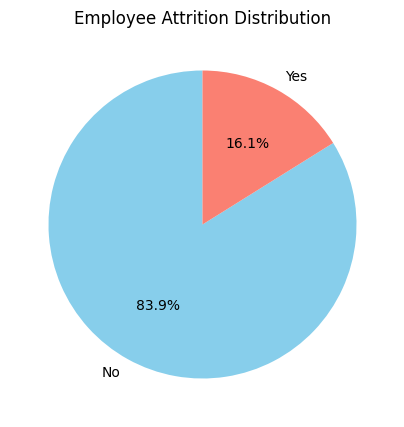

Attrition Value Counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(5,5))
attr_counts = df["Attrition"].value_counts()
plt.pie(attr_counts, labels=attr_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue","salmon"])
plt.title("Employee Attrition Distribution")
plt.show()

print("Attrition Value Counts:")
print(attr_counts)

Numeric columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


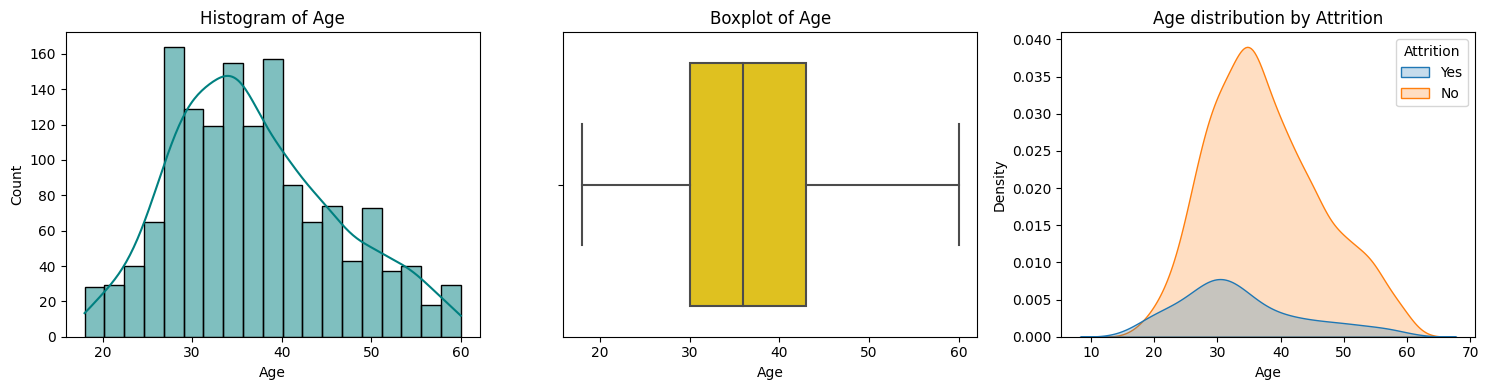

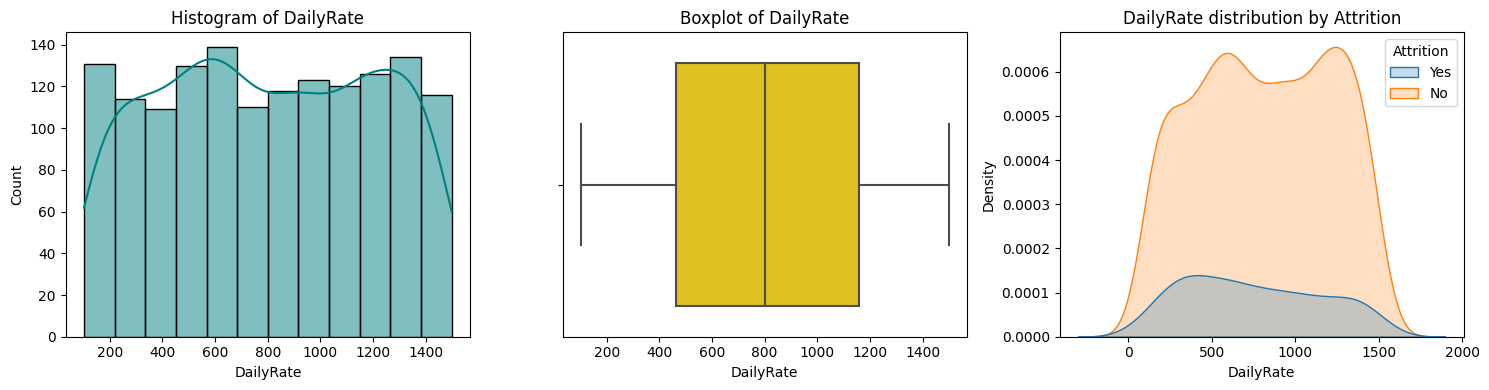

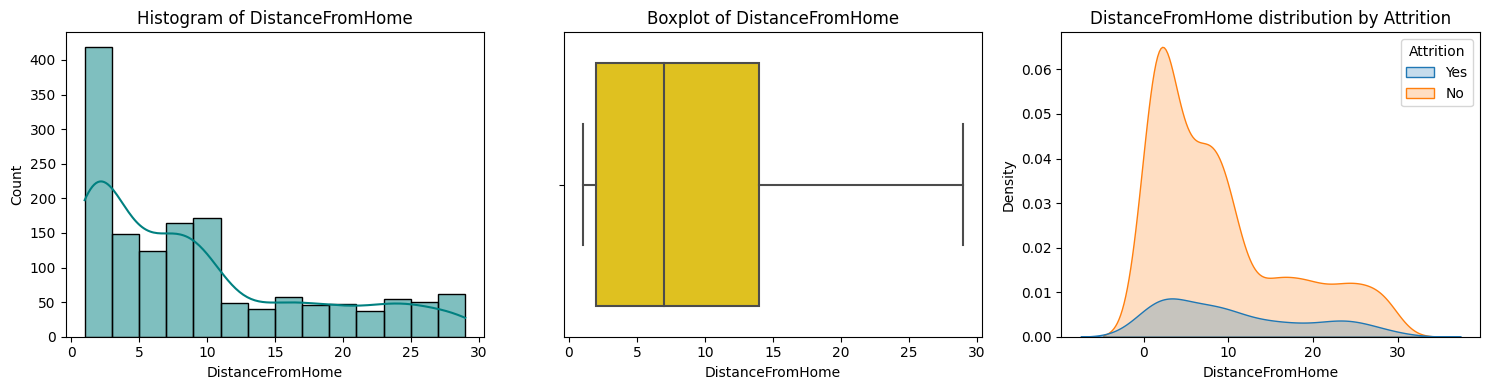

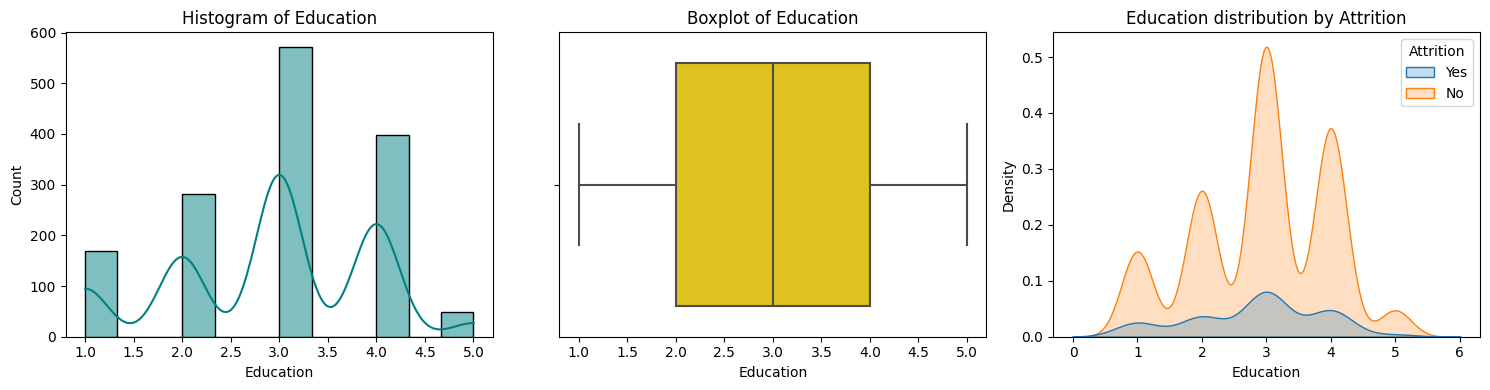

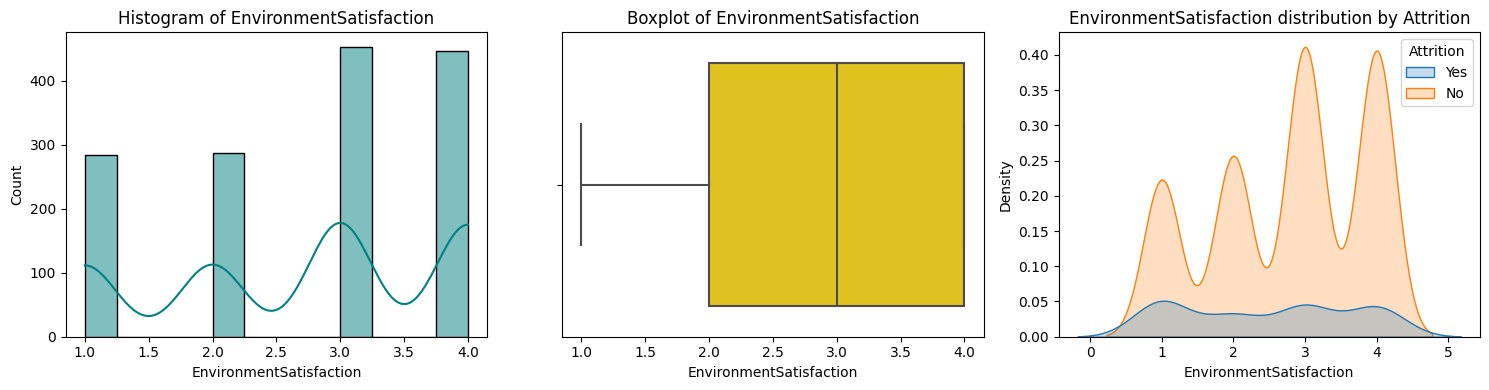

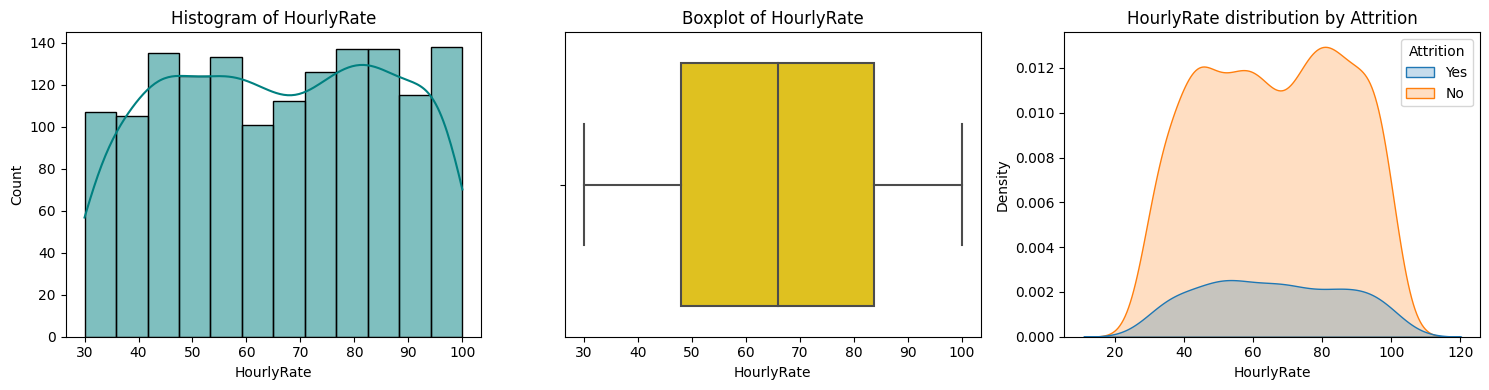

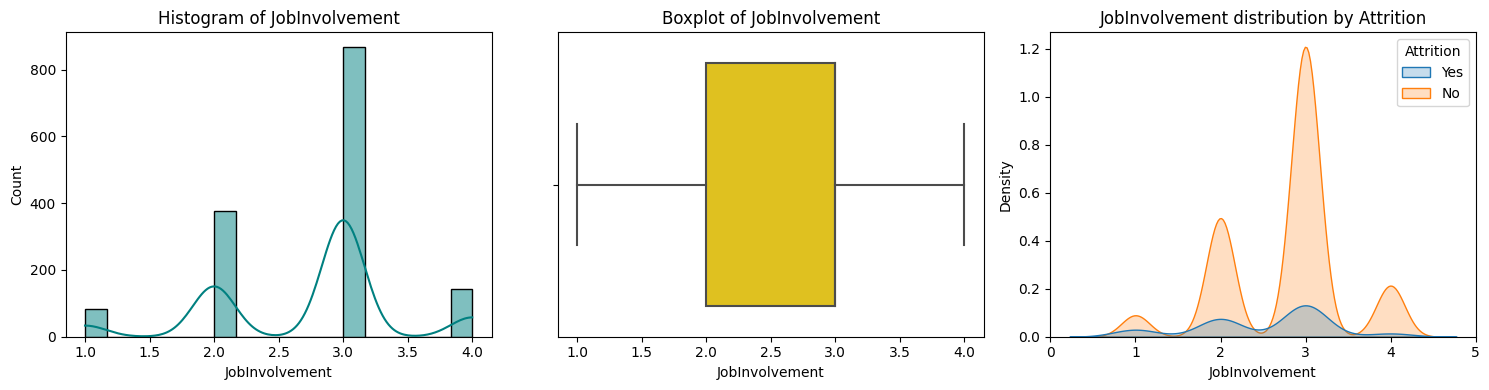

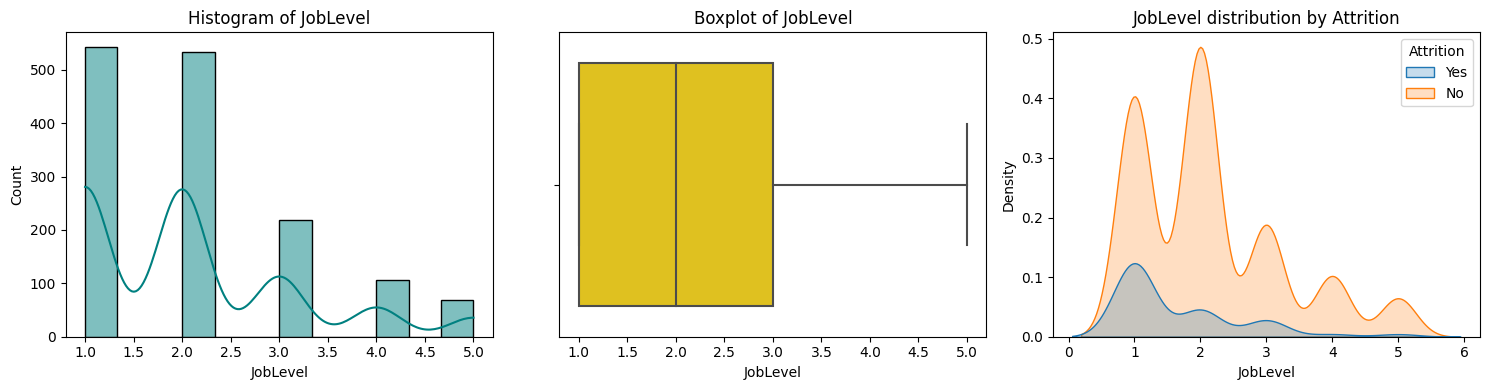

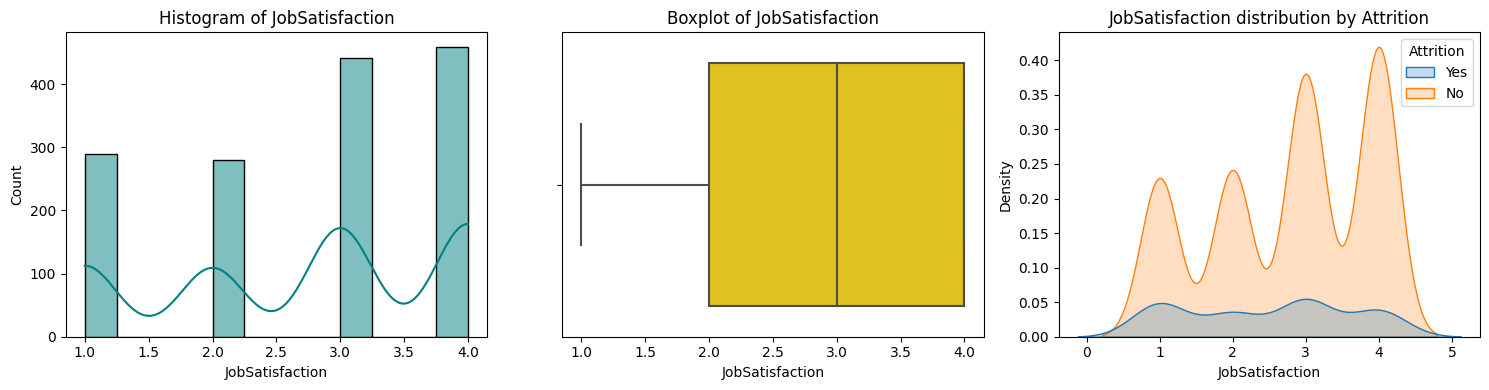

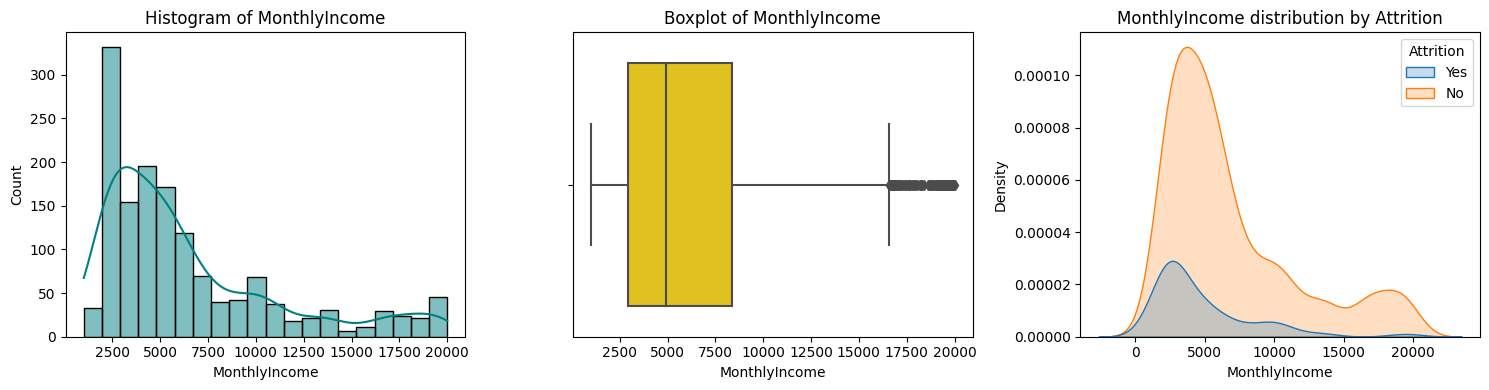

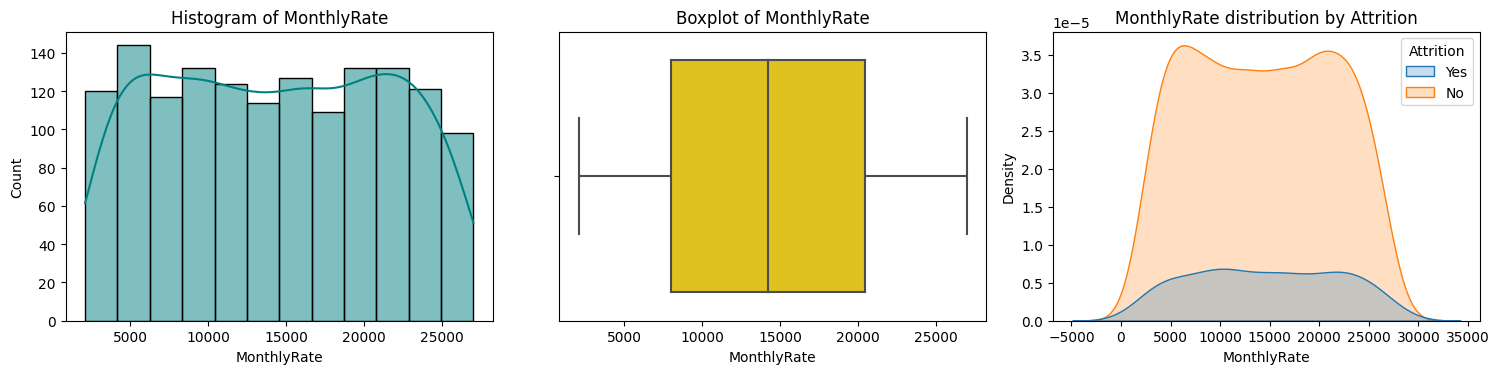

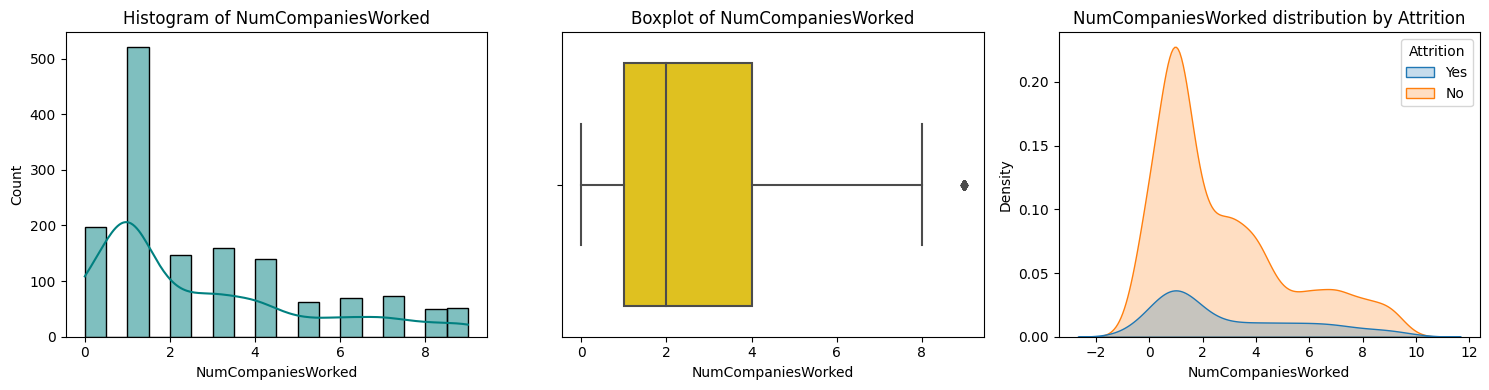

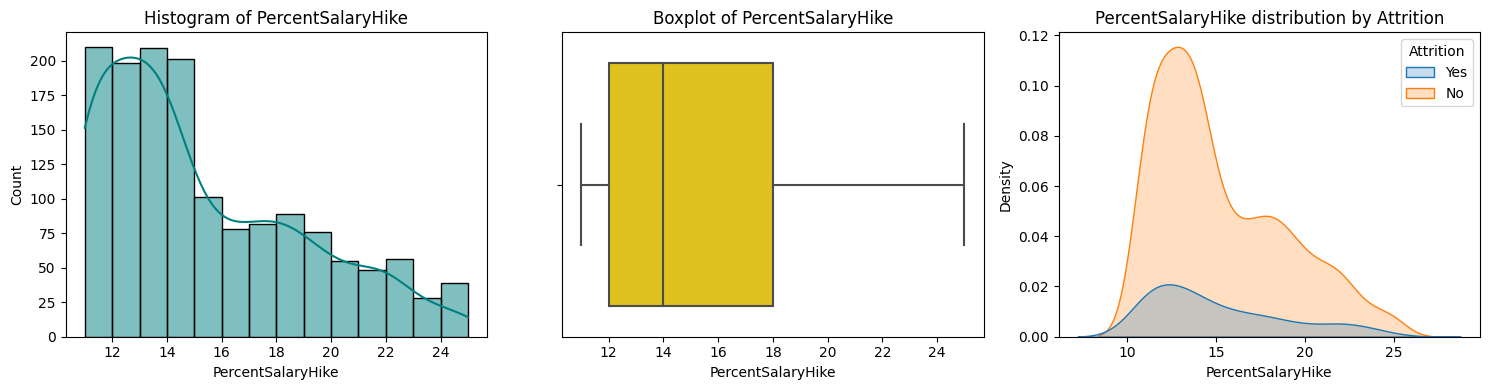

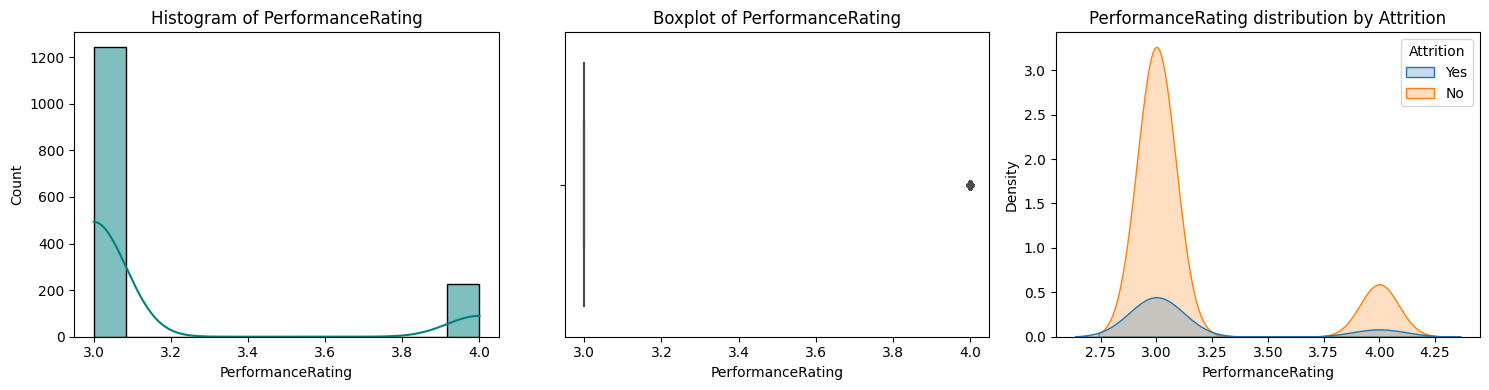

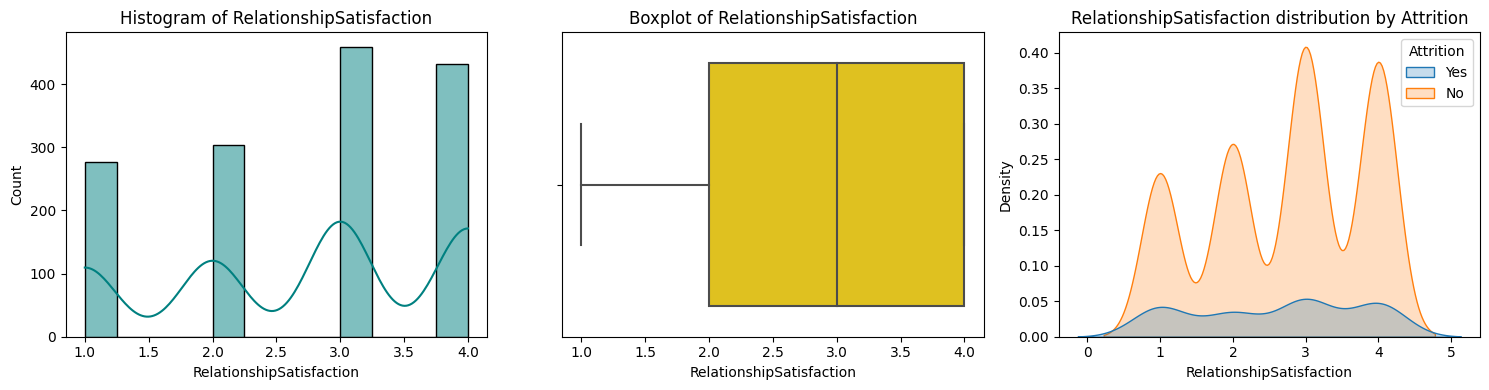

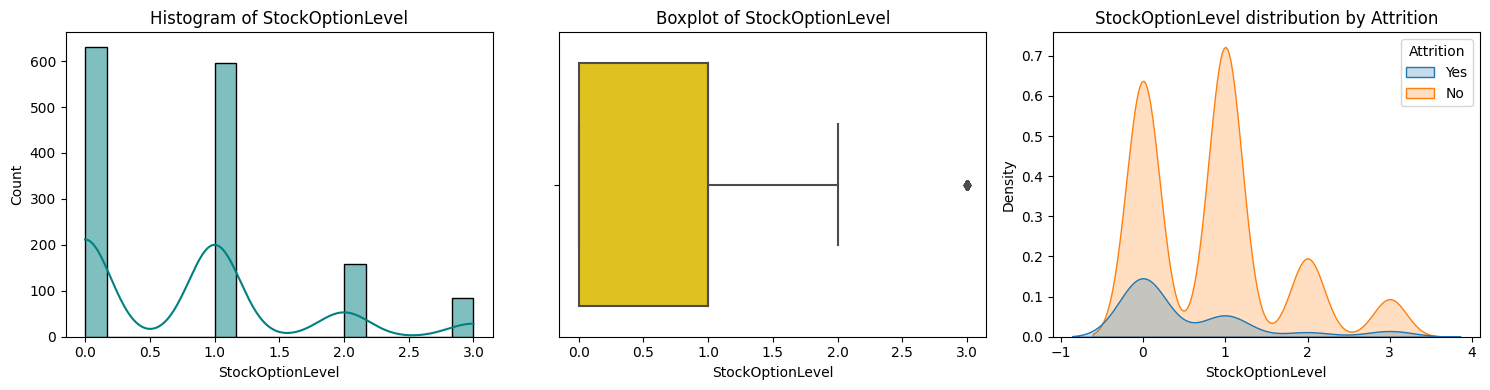

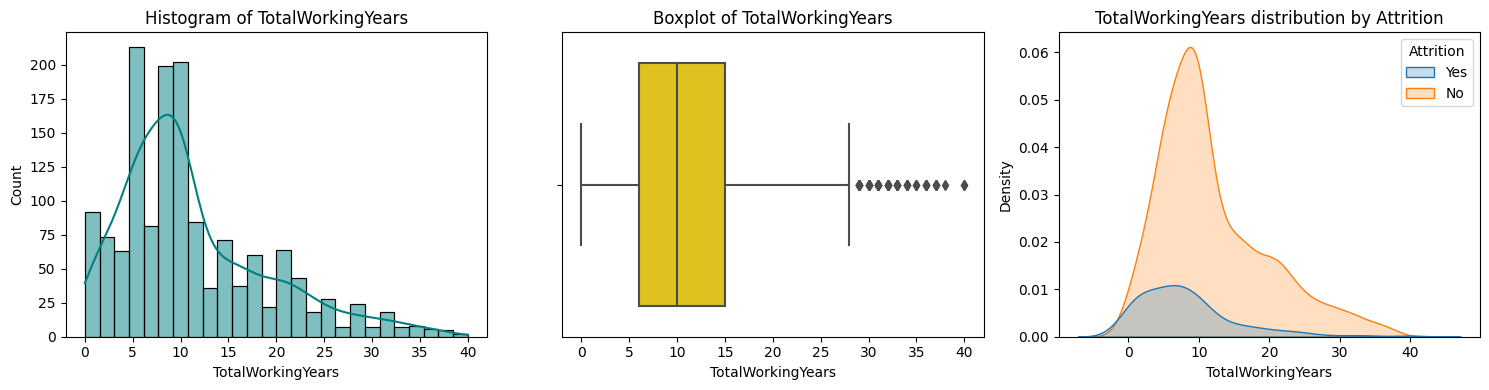

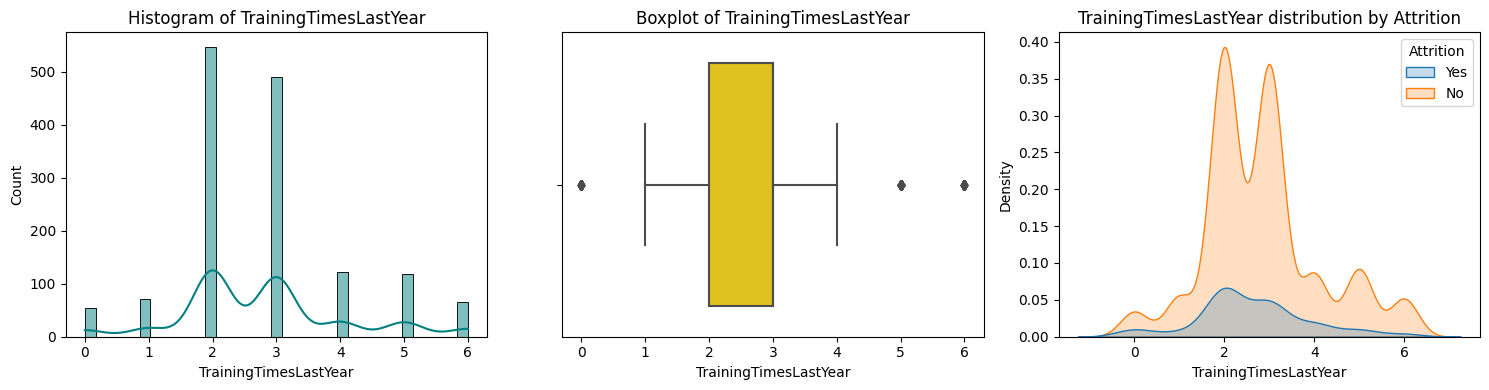

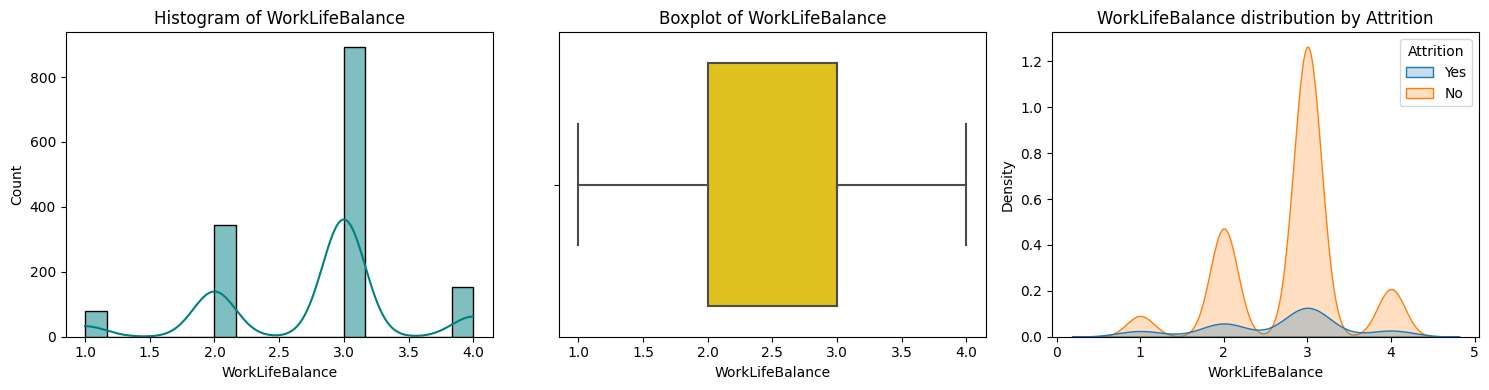

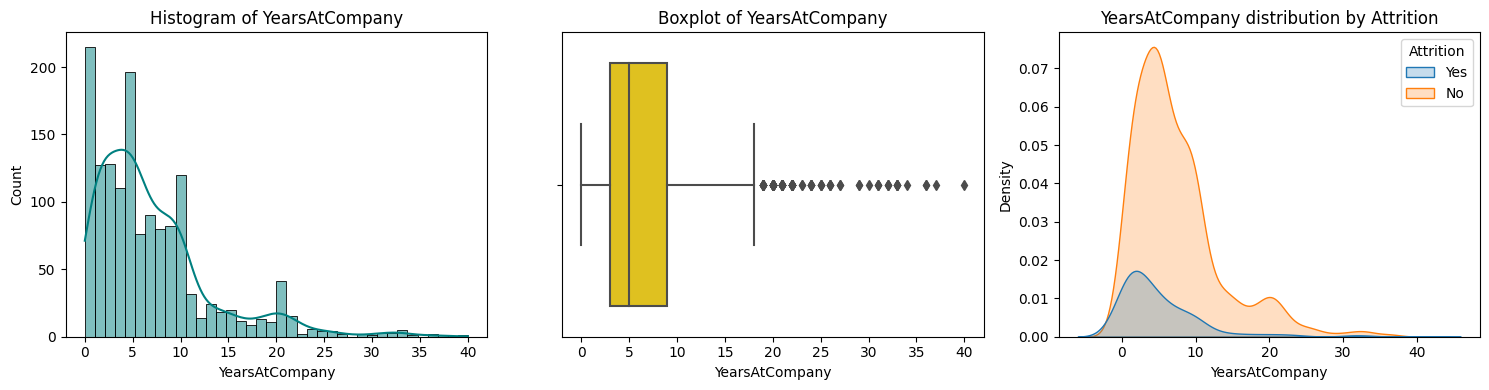

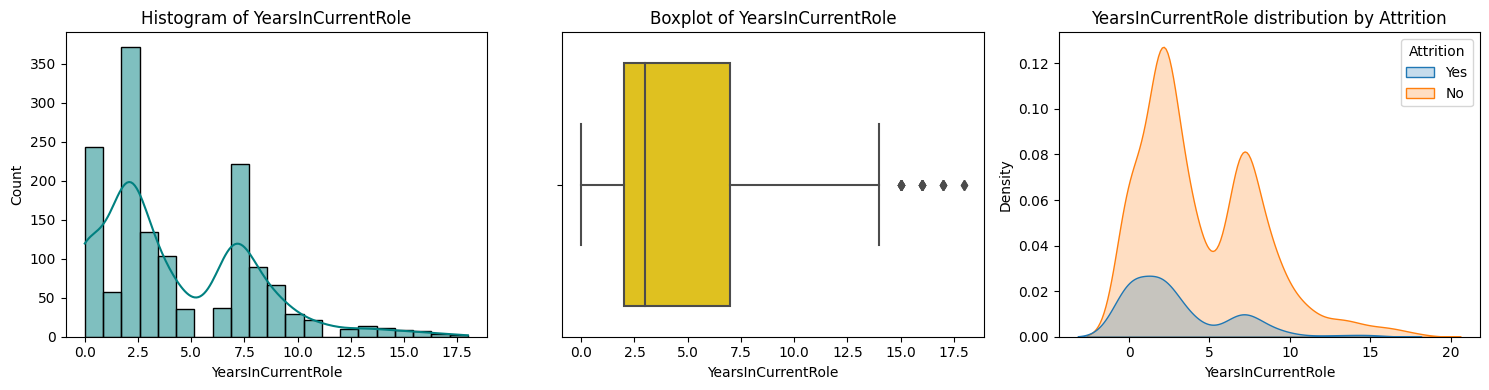

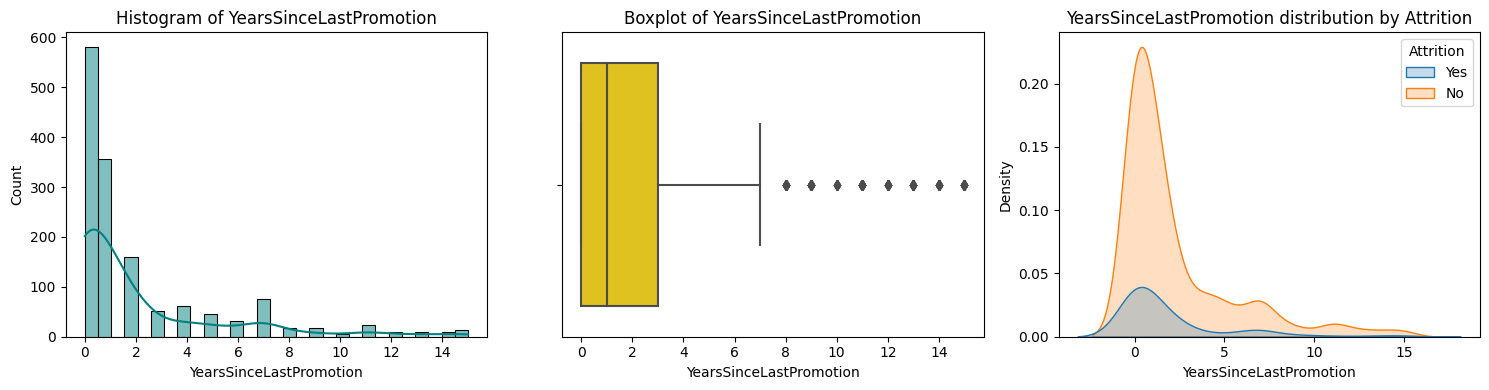

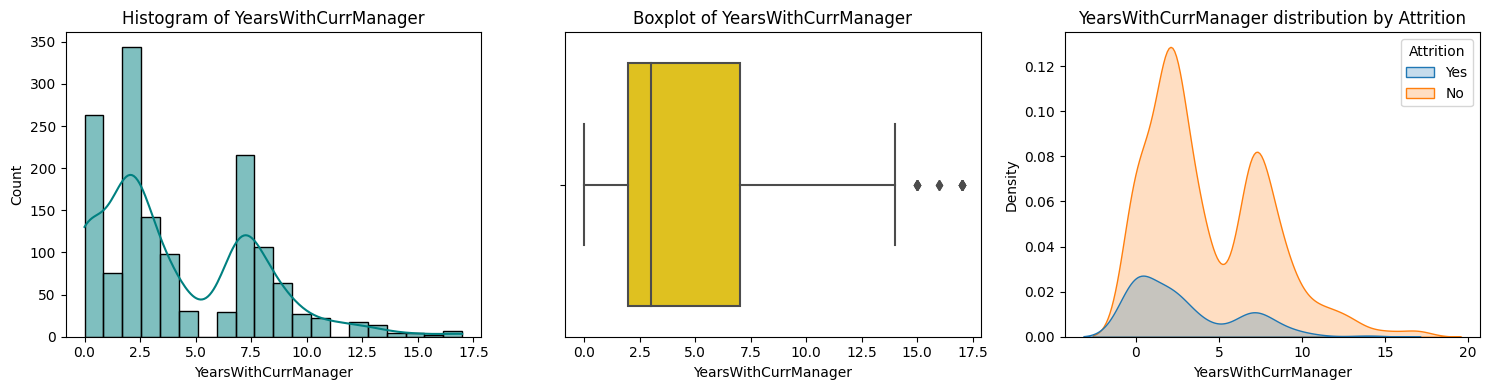

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", num_cols.tolist())

for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # 1) Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color="teal")
    axes[0].set_title(f"Histogram of {col}")
    
    # 2) Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="gold")
    axes[1].set_title(f"Boxplot of {col}")
    
    # 3) KDE by Attrition
    if "Attrition" in df.columns:
        sns.kdeplot(data=df, x=col, hue="Attrition", fill=True, ax=axes[2])
        axes[2].set_title(f"{col} distribution by Attrition")
    else:
        sns.kdeplot(x=df[col], fill=True, ax=axes[2])
    
    plt.tight_layout()
    plt.show()

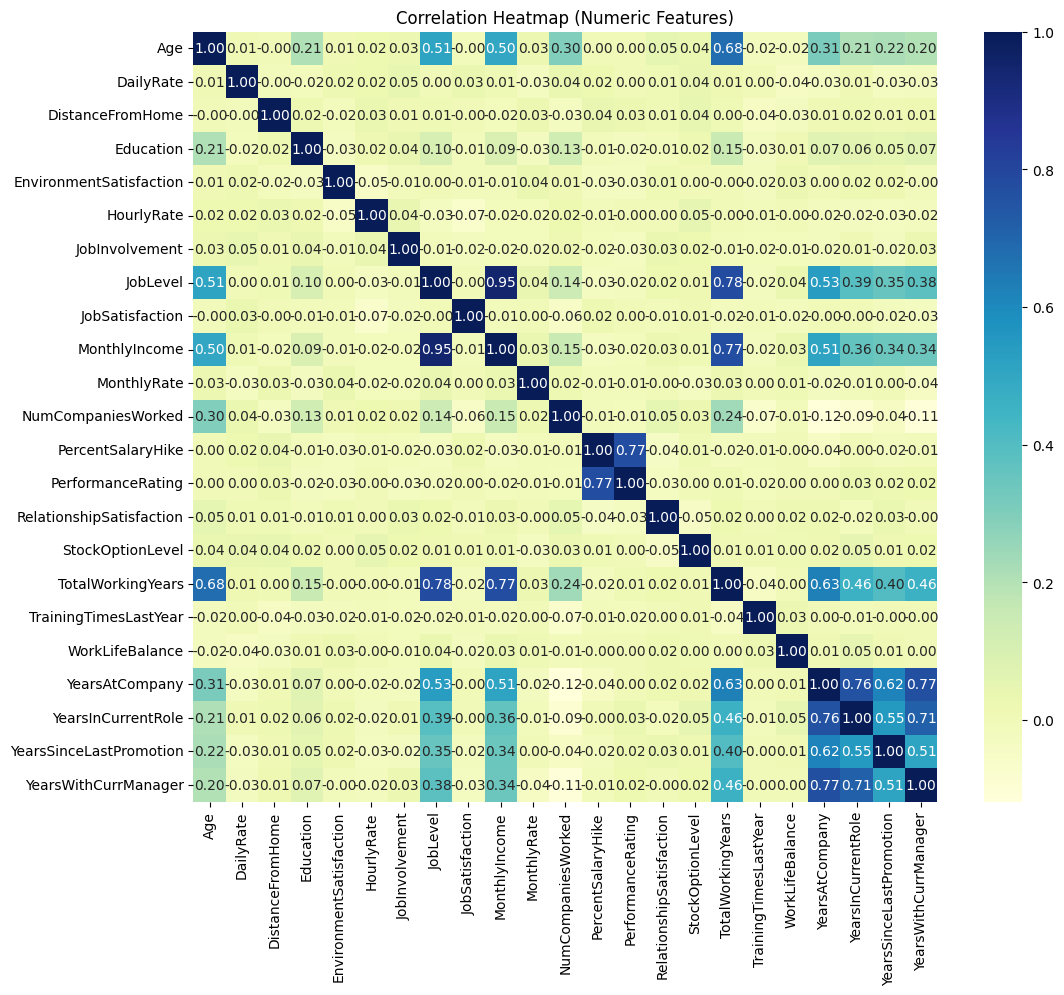

In [9]:
plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

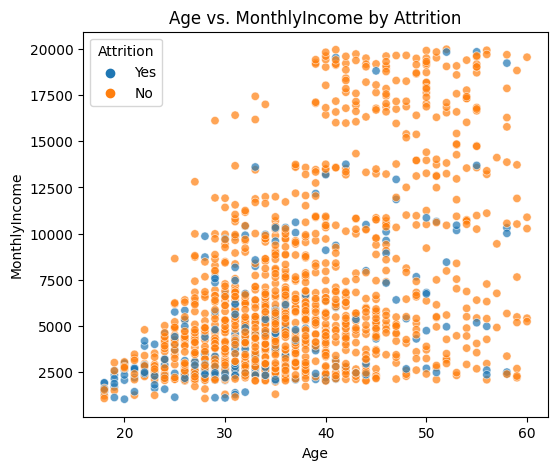

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Age", y="MonthlyIncome", data=df, hue="Attrition", alpha=0.7)
plt.title("Age vs. MonthlyIncome by Attrition")
plt.show()

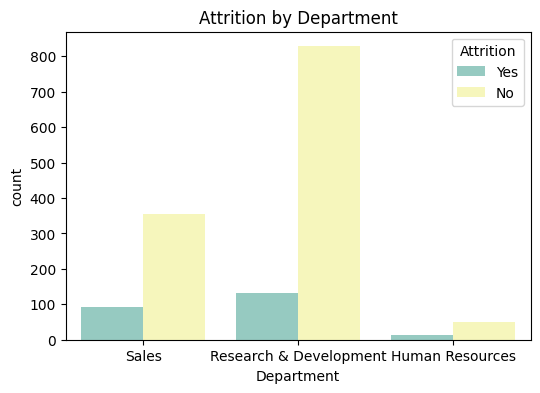

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set3")
plt.title("Attrition by Department")
plt.show()

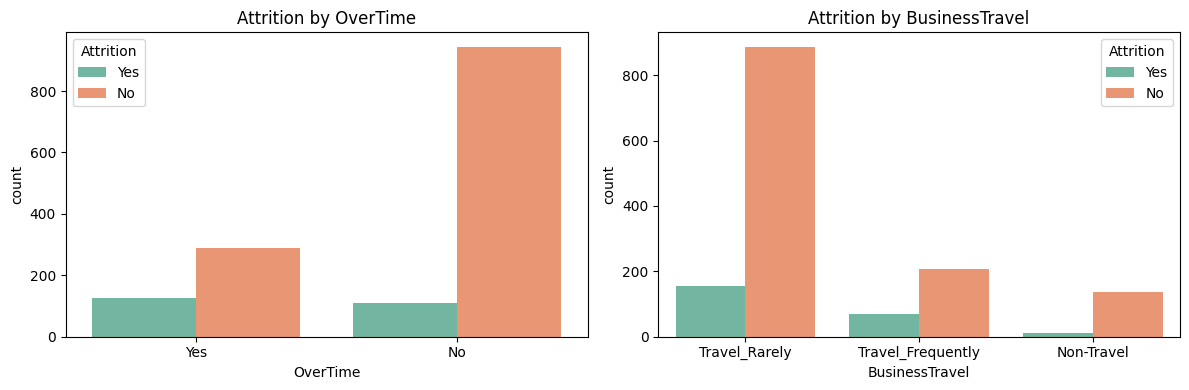

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(data=df, x="OverTime", hue="Attrition", palette="Set2", ax=ax[0])
ax[0].set_title("Attrition by OverTime")

sns.countplot(data=df, x="BusinessTravel", hue="Attrition", palette="Set2", ax=ax[1])
ax[1].set_title("Attrition by BusinessTravel")

plt.tight_layout()
plt.show()

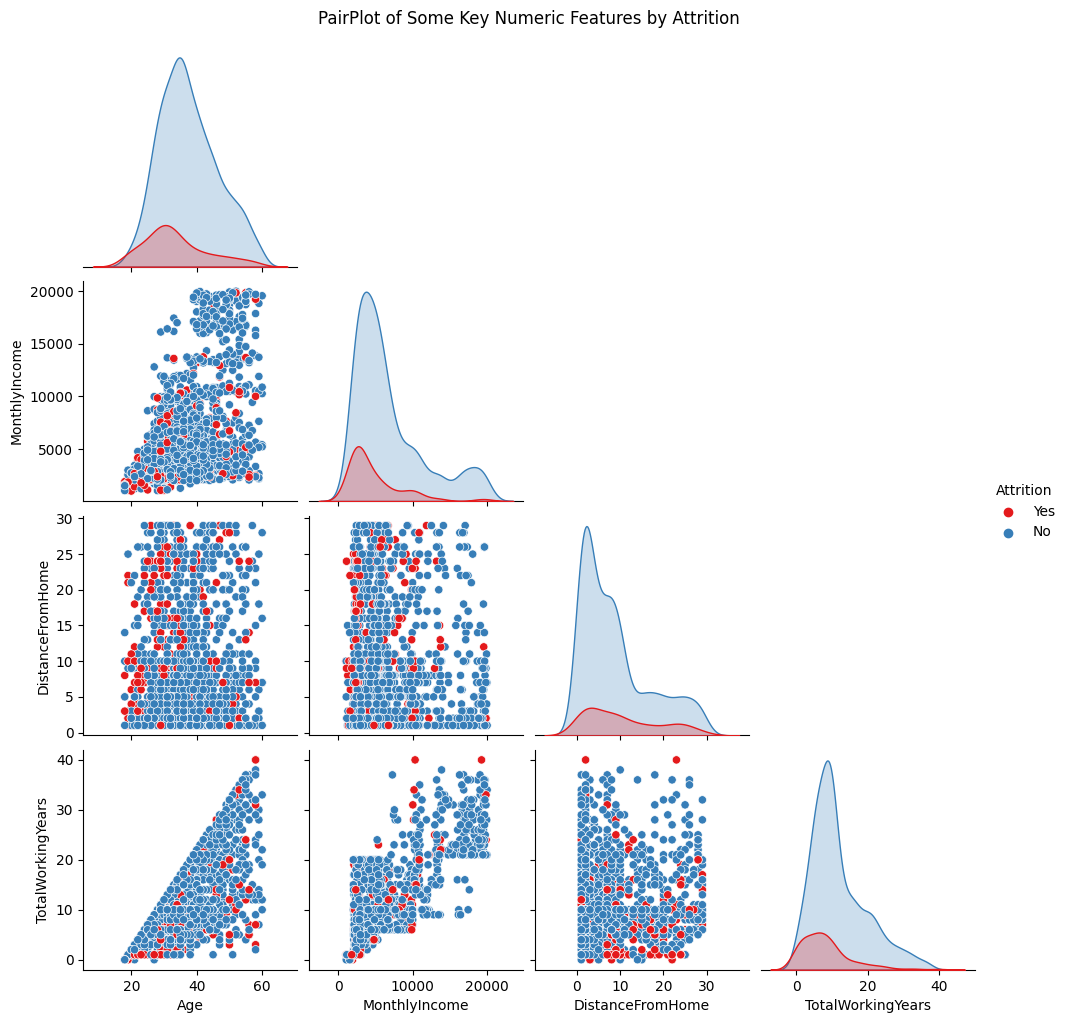

In [13]:
# Example: let's pick a subset to keep the plot from being too large
subset = ["Age", "MonthlyIncome", "DistanceFromHome", "TotalWorkingYears", "Attrition"]
sns.pairplot(df[subset], hue="Attrition", diag_kind="kde", corner=True, palette="Set1")
plt.suptitle("PairPlot of Some Key Numeric Features by Attrition", y=1.02)
plt.show()

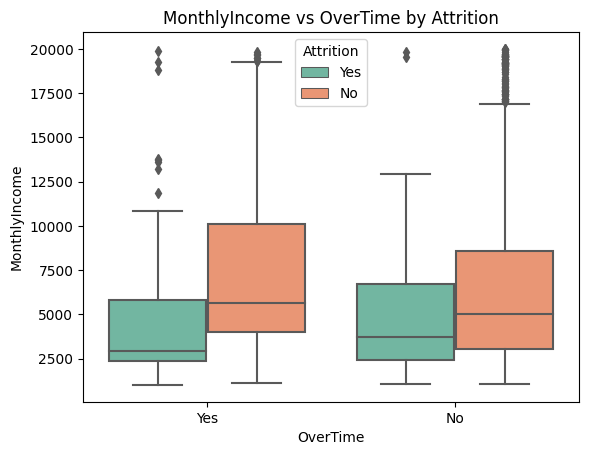

In [14]:
sns.boxplot(data=df, x="OverTime", y="MonthlyIncome", hue="Attrition", palette="Set2")
plt.title("MonthlyIncome vs OverTime by Attrition")
plt.show()

In [17]:
px.scatter(df, x="Age", y="YearsAtCompany", color=df["Attrition"].map({ "Yes": "No", "No": "Yes" }),
           title="Age vs YearsAtCompany colored by Attrition",
           hover_data=["MonthlyIncome","JobRole"])


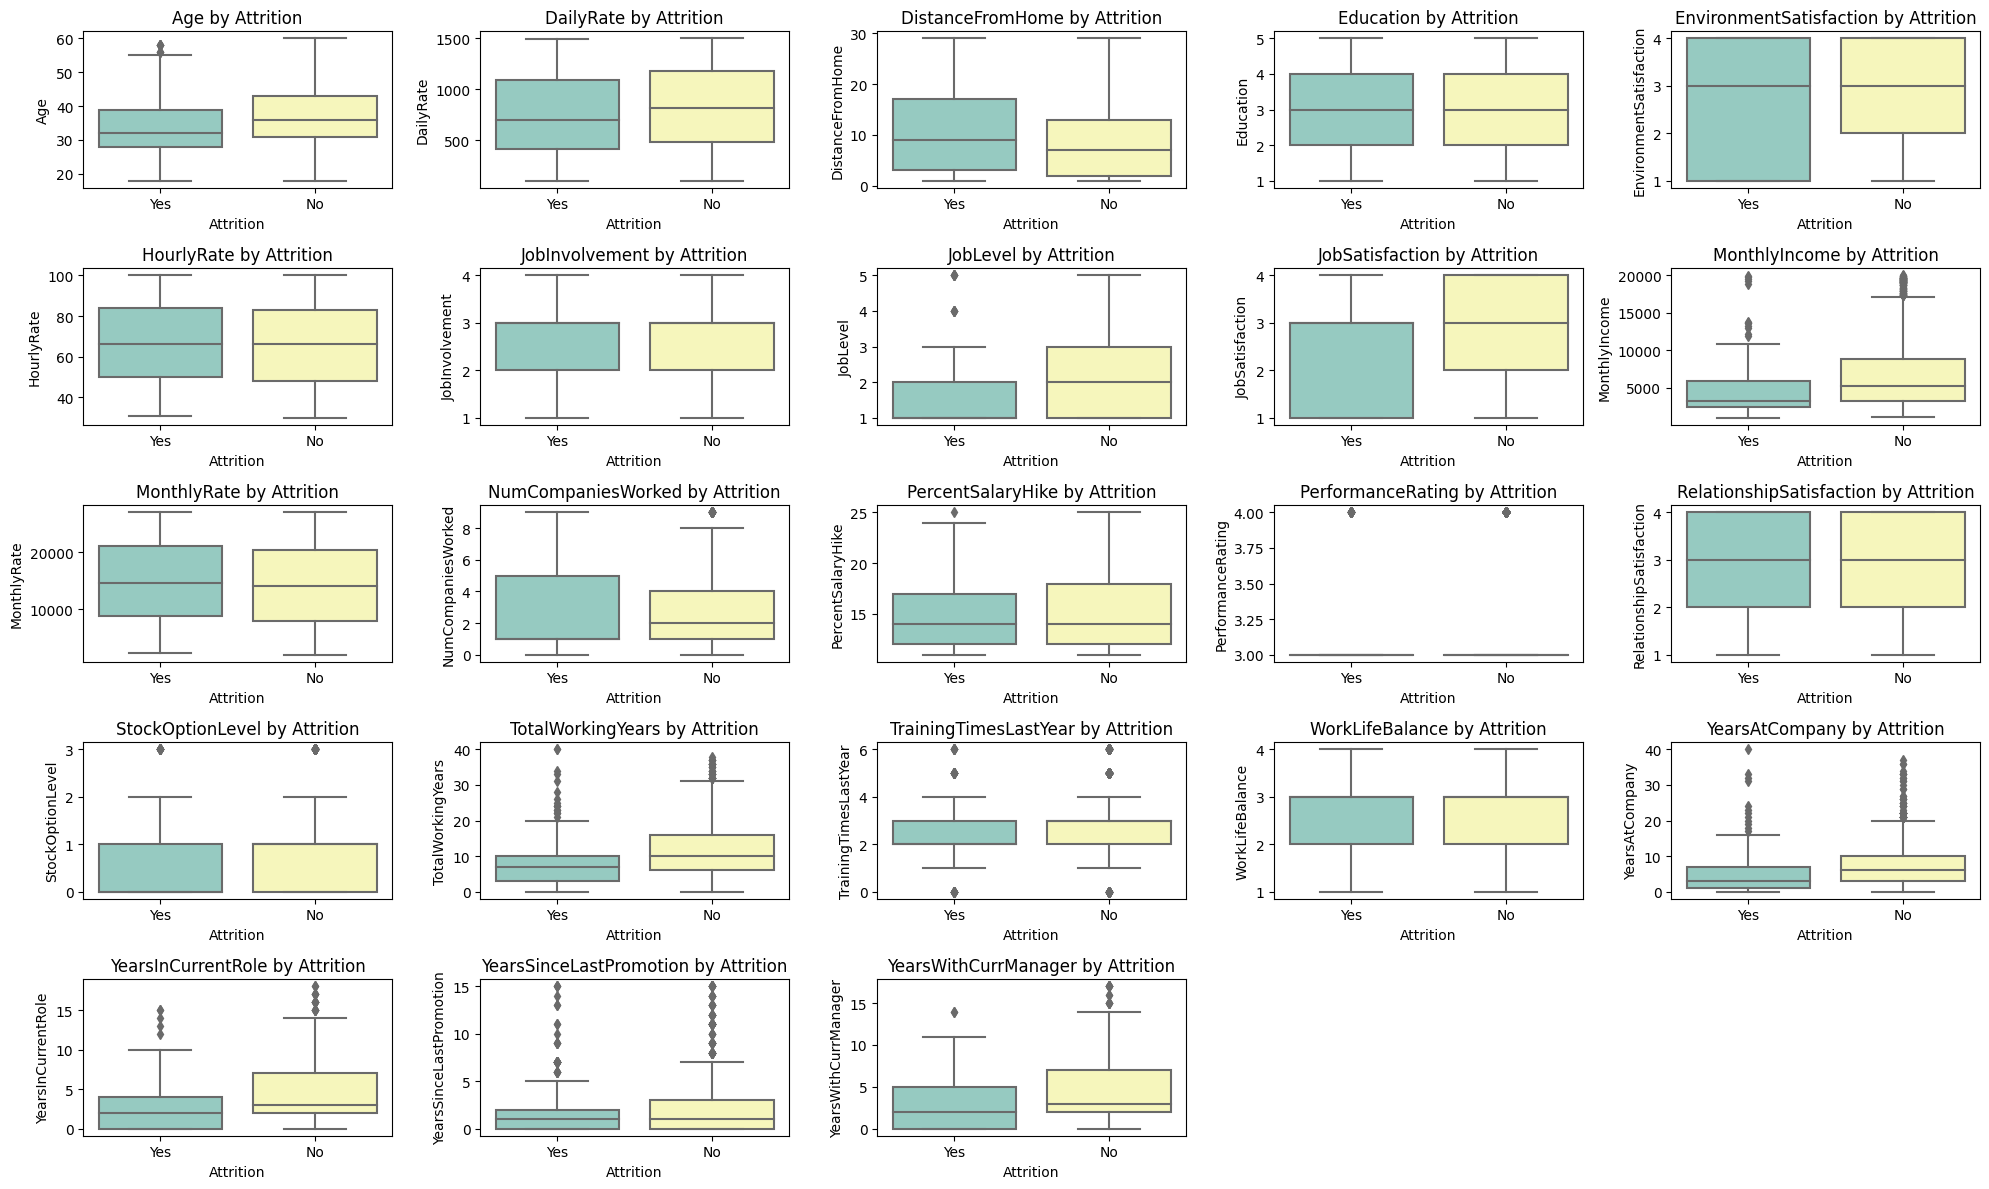

In [18]:
plt.figure(figsize=(20,12))
for i, col in enumerate(num_cols,1):
    plt.subplot(5,5,i)
    sns.boxplot(data=df, x="Attrition", y=col, palette="Set3")
    plt.title(f"{col} by Attrition")
    plt.tight_layout()
plt.show()

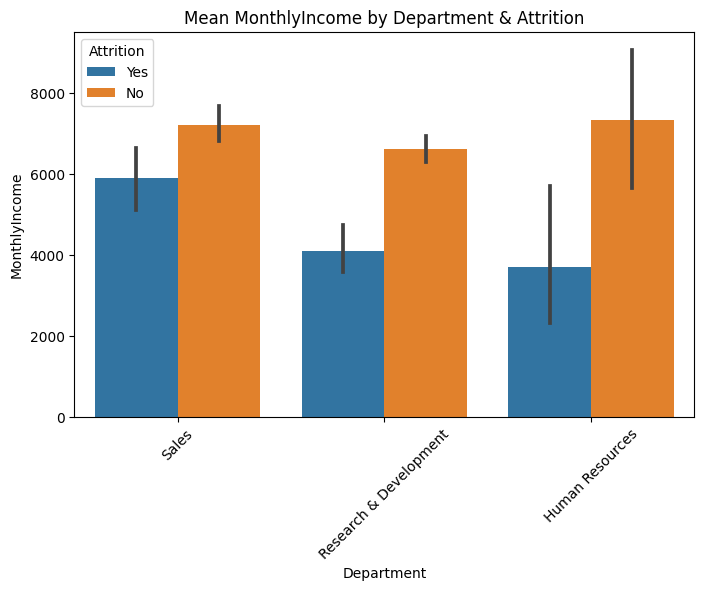

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Department", y="MonthlyIncome", hue="Attrition", estimator=np.mean)
plt.title("Mean MonthlyIncome by Department & Attrition")
plt.xticks(rotation=45)
plt.show()

In [20]:
pivot_table = pd.pivot_table(
    df, 
    values="MonthlyIncome", 
    index="Department", 
    columns="Attrition", 
    aggfunc="mean"
)
pivot_table

Attrition                        No          Yes
Department                                      
Human Resources         7345.980392  3715.750000
Research & Development  6630.326087  4108.075188
Sales                   7232.240113  5908.456522

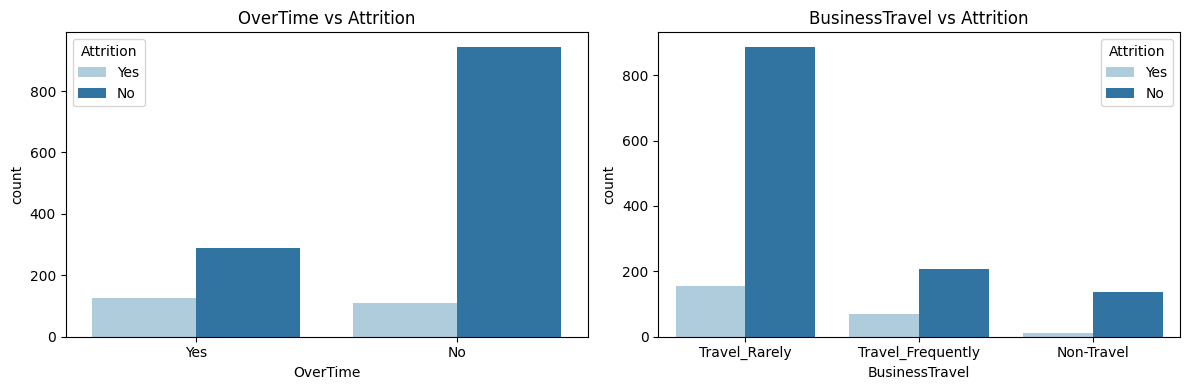

In [21]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

# OverTime
sns.countplot(data=df, x="OverTime", hue="Attrition", ax=axes[0], palette="Paired")
axes[0].set_title("OverTime vs Attrition")

# BusinessTravel
sns.countplot(data=df, x="BusinessTravel", hue="Attrition", ax=axes[1], palette="Paired")
axes[1].set_title("BusinessTravel vs Attrition")

plt.tight_layout()
plt.show()

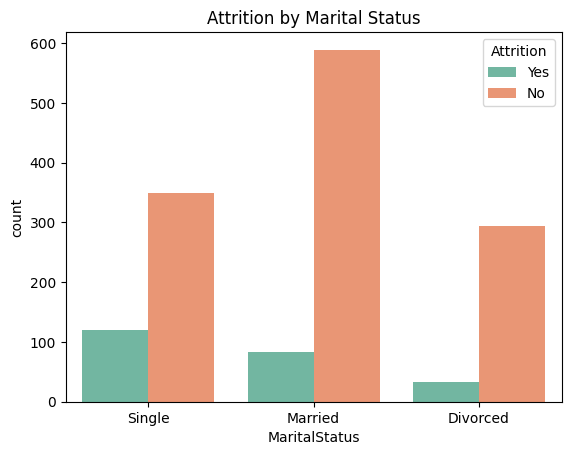

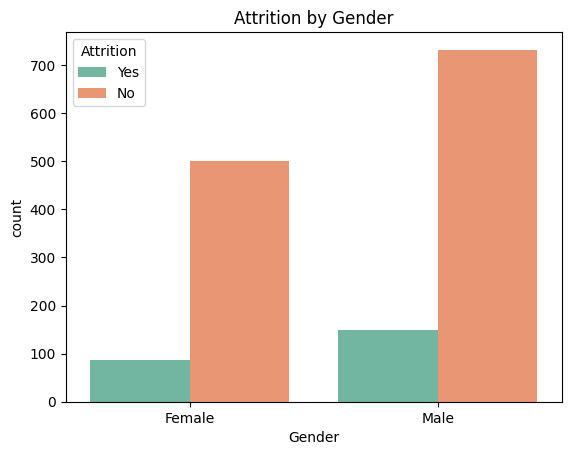

In [22]:
sns.countplot(data=df, x="MaritalStatus", hue="Attrition", palette="Set2")
plt.title("Attrition by Marital Status")
plt.show()

sns.countplot(data=df, x="Gender", hue="Attrition", palette="Set2")
plt.title("Attrition by Gender")
plt.show()

In [23]:
fig = px.scatter(
    df, 
    x="Age", y="MonthlyIncome", 
    color="Attrition", 
    hover_data=["JobRole","Department","OverTime"], 
    title="Age vs MonthlyIncome (colored by Attrition)"
)
fig.show()

In [24]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [25]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]  # 1 = Yes (or 0, depending on labelencoder)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2023, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing  set:", X_test.shape, y_test.shape)

Training set: (1176, 30) (1176,)
Testing  set: (294, 30) (294,)


RandomForest Feature Importances:
 MonthlyIncome               0.076655
Age                         0.062512
DailyRate                   0.057736
HourlyRate                  0.053674
OverTime                    0.053601
MonthlyRate                 0.052504
TotalWorkingYears           0.050494
DistanceFromHome            0.047100
YearsAtCompany              0.045309
PercentSalaryHike           0.036672
NumCompaniesWorked          0.036338
YearsWithCurrManager        0.030374
JobRole                     0.030268
TrainingTimesLastYear       0.028042
YearsInCurrentRole          0.027975
JobSatisfaction             0.027877
RelationshipSatisfaction    0.025972
JobInvolvement              0.025757
MaritalStatus               0.025714
EnvironmentSatisfaction     0.025502
StockOptionLevel            0.025315
WorkLifeBalance             0.023535
YearsSinceLastPromotion     0.022725
Education                   0.022712
EducationField              0.022561
JobLevel                    0.020289
Bus

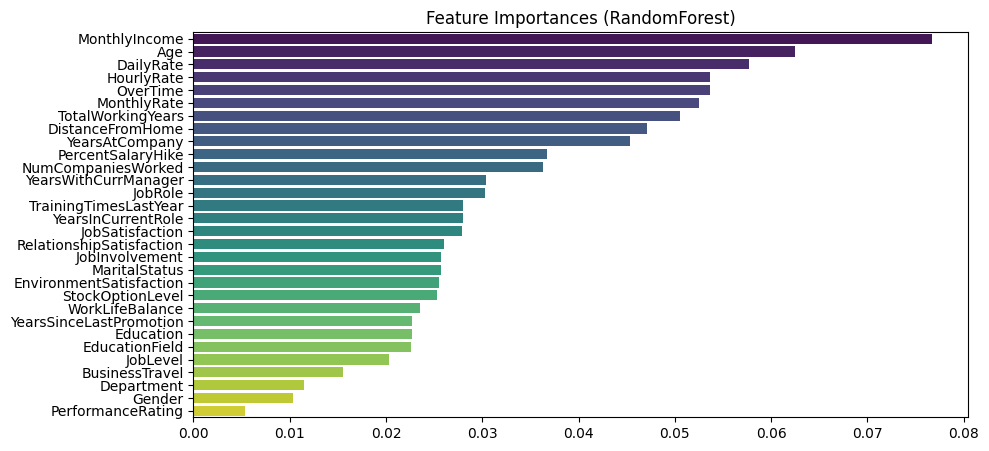

In [26]:
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_train, y_train)

feature_importances = pd.Series(rf_temp.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("RandomForest Feature Importances:\n", feature_importances)

# Let's plot them
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importances (RandomForest)")
plt.show()

In [27]:
# Example: keep top 8
top_features = feature_importances.index[:15]
print("Selected Top Features:", top_features.tolist())

Selected Top Features: ['MonthlyIncome', 'Age', 'DailyRate', 'HourlyRate', 'OverTime', 'MonthlyRate', 'TotalWorkingYears', 'DistanceFromHome', 'YearsAtCompany', 'PercentSalaryHike', 'NumCompaniesWorked', 'YearsWithCurrManager', 'JobRole', 'TrainingTimesLastYear', 'YearsInCurrentRole']


In [28]:
lr_for_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(lr_for_rfe, n_features_to_select=15)  # choose how many features you want
rfe.fit(X_train, y_train)

selected_rfe_features = X_train.columns[rfe.support_]
print("RFE-Selected Features:", selected_rfe_features.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

RFE-Selected Features: ['Department', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [29]:
# For demonstration, let's pick the intersection of top RF features & RFE (just an example):
best_features_rf = feature_importances.index[:15]
best_features_rfe = X_train.columns[rfe.support_]
best_features_combined = list(set(best_features_rf).union(set(best_features_rfe)))

print("Combined best features:", best_features_combined)

# Create sub-dataframe
df_best = df[ best_features_combined + ["Attrition"] ]
df_best.head()

Combined best features: ['MonthlyIncome', 'MaritalStatus', 'NumCompaniesWorked', 'YearsAtCompany', 'YearsSinceLastPromotion', 'WorkLifeBalance', 'TotalWorkingYears', 'Gender', 'TrainingTimesLastYear', 'YearsWithCurrManager', 'RelationshipSatisfaction', 'OverTime', 'JobSatisfaction', 'JobLevel', 'DistanceFromHome', 'YearsInCurrentRole', 'Department', 'JobRole', 'EnvironmentSatisfaction', 'HourlyRate', 'MonthlyRate', 'JobInvolvement', 'PercentSalaryHike', 'Age', 'DailyRate']


MonthlyIncome  MaritalStatus  NumCompaniesWorked  YearsAtCompany  \
0           5993              2                   8               6   
1           5130              1                   1              10   
2           2090              2                   6               0   
3           2909              1                   1               8   
4           3468              1                   9               2   

   YearsSinceLastPromotion  WorkLifeBalance  TotalWorkingYears  Gender  \
0                        0                1                  8       0   
1                        1                3                 10       1   
2                        0                3                  7       1   
3                        3                3                  8       0   
4                        2                3                  6       1   

   TrainingTimesLastYear  YearsWithCurrManager  ...  Department  JobRole  \
0                      0                     5  ...           2        7   
1                      3                     7  ...           1        6   
2                      3                     0  ...           1        2   
3                      3                     0  ...           1        6   
4                      3                     2  ...           1        2   

   EnvironmentSatisfaction  HourlyRate  MonthlyRate  JobInvolvement  \
0                        2          94        19479               3   
1                        3          61        24907               2   
2                        4          92         2396               2   
3                        4          56        23159               3   
4                        1          40        16632               3   

   PercentSalaryHike  Age  DailyRate  Attrition  
0                 11   41       1102          1  
1                 23   49        279          0  
2                 15   37       1373          1  
3                 11   33       1392          0  
4                 12   27        591          0  

[5 rows x 26 columns]

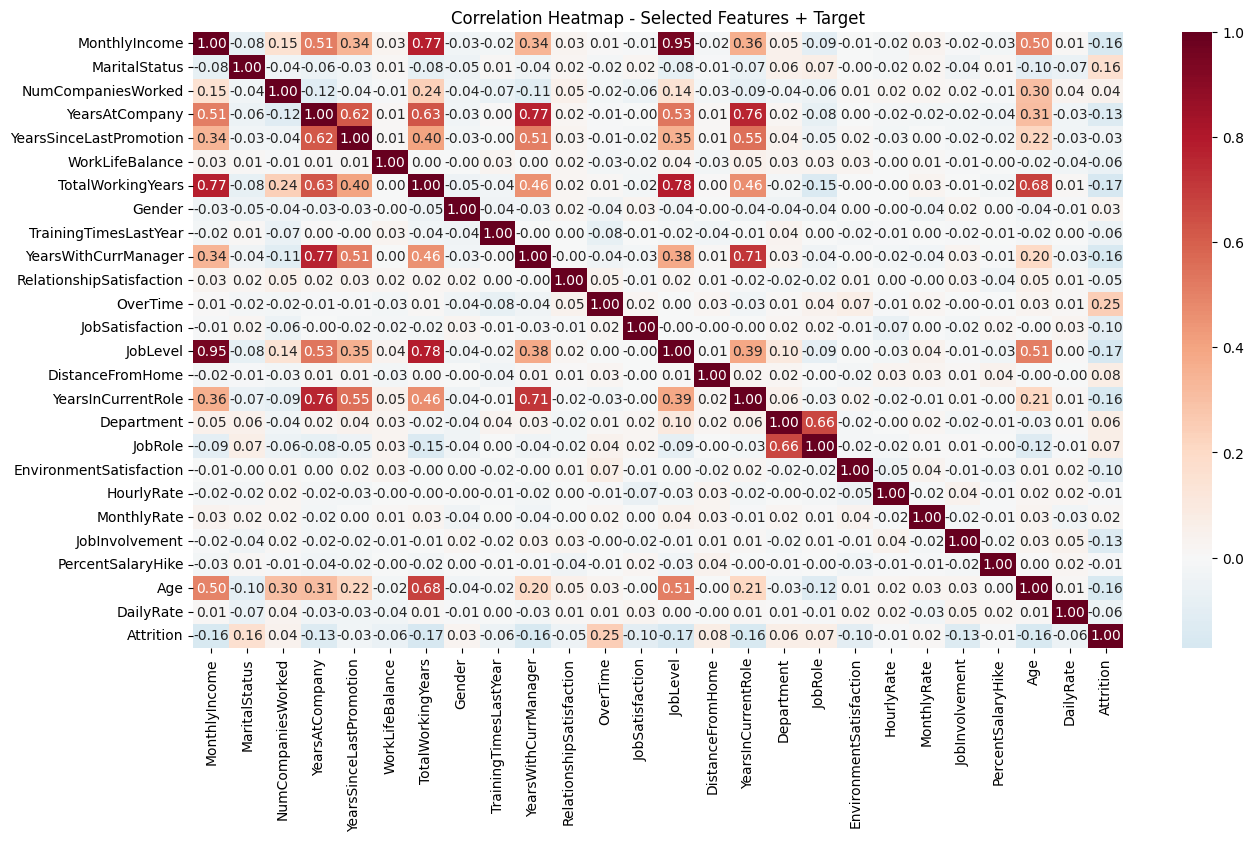

In [30]:
plt.figure(figsize=(15, 8))
corr_best = df_best.corr()
sns.heatmap(corr_best, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap - Selected Features + Target")
plt.show()

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [32]:
print("Original y_train distribution:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE y_train distribution:")
print(y_train_bal.value_counts())

Original y_train distribution:
Attrition
0    986
1    190
Name: count, dtype: int64

After SMOTE y_train distribution:
Attrition
0    986
1    986
Name: count, dtype: int64


In [33]:
def evaluate_model(model, Xtr, ytr, Xte, yte, model_name="Model"):
    model.fit(Xtr, ytr)
    pred_tr = model.predict(Xtr)
    pred_te = model.predict(Xte)
    
    acc_tr = accuracy_score(ytr, pred_tr)
    acc_te = accuracy_score(yte, pred_te)
    
    print(f"\n=== {model_name} ===")
    print("Training Accuracy:", round(acc_tr,4))
    print("Testing Accuracy: ", round(acc_te,4))
    
    # Classification Report
    print("\nClassification Report (Test):")
    print(classification_report(yte, pred_te))
    
    # Confusion Matrix
    cm = confusion_matrix(yte, pred_te)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix (Test)")
    plt.show()


=== Logistic Regression ===
Training Accuracy: 0.7764
Testing Accuracy:  0.7789

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       247
           1       0.40      0.72      0.51        47

    accuracy                           0.78       294
   macro avg       0.67      0.76      0.68       294
weighted avg       0.85      0.78      0.80       294



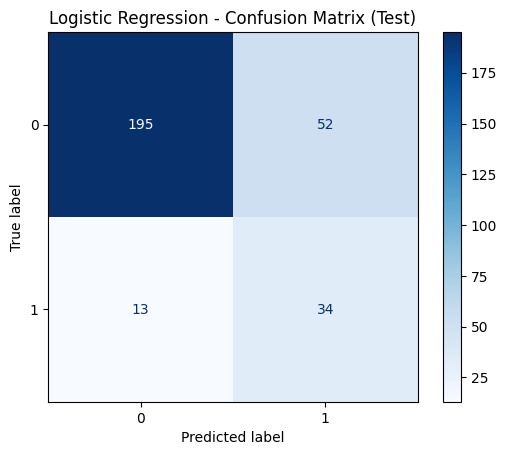

In [34]:
lr_model = LogisticRegression(max_iter=2000, random_state=42)
evaluate_model(lr_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "Logistic Regression")


=== KNN ===
Training Accuracy: 0.8737
Testing Accuracy:  0.6497

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.64      0.76       247
           1       0.27      0.68      0.38        47

    accuracy                           0.65       294
   macro avg       0.59      0.66      0.57       294
weighted avg       0.81      0.65      0.70       294



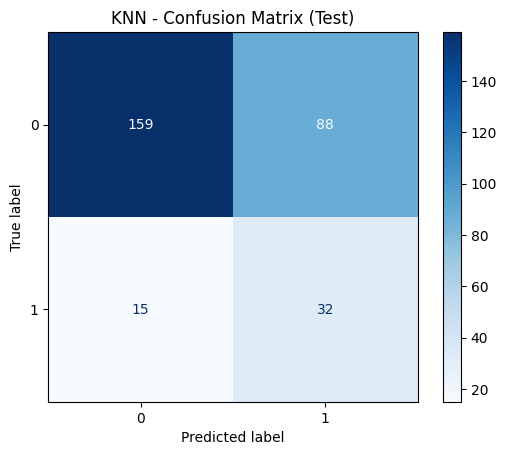

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "KNN")


=== SVM ===
Training Accuracy: 0.9741
Testing Accuracy:  0.8129

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       247
           1       0.42      0.45      0.43        47

    accuracy                           0.81       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.82      0.81      0.82       294



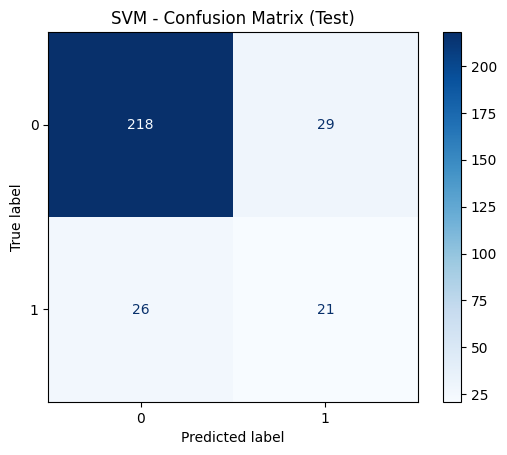

In [36]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
evaluate_model(svm_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "SVM")


=== GaussianNB ===
Training Accuracy: 0.7033
Testing Accuracy:  0.6122

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.59      0.72       247
           1       0.25      0.72      0.37        47

    accuracy                           0.61       294
   macro avg       0.59      0.66      0.55       294
weighted avg       0.81      0.61      0.66       294



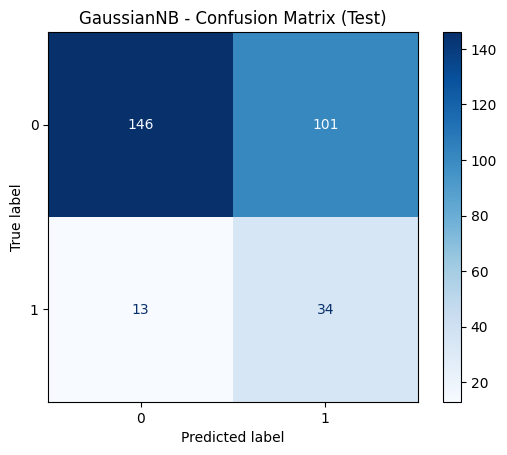

In [37]:
nb_model = GaussianNB()
evaluate_model(nb_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "GaussianNB")


=== DecisionTree ===
Training Accuracy: 0.8671
Testing Accuracy:  0.7857

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       247
           1       0.38      0.55      0.45        47

    accuracy                           0.79       294
   macro avg       0.64      0.69      0.66       294
weighted avg       0.82      0.79      0.80       294



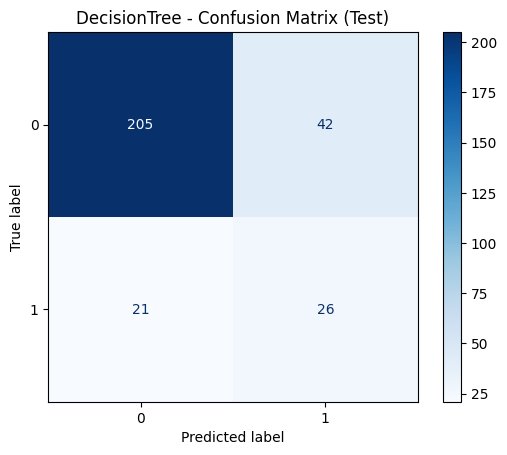

In [38]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
evaluate_model(dt_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "DecisionTree")


=== RandomForest ===
Training Accuracy: 0.9143
Testing Accuracy:  0.8231

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.46      0.55      0.50        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.70       294
weighted avg       0.84      0.82      0.83       294



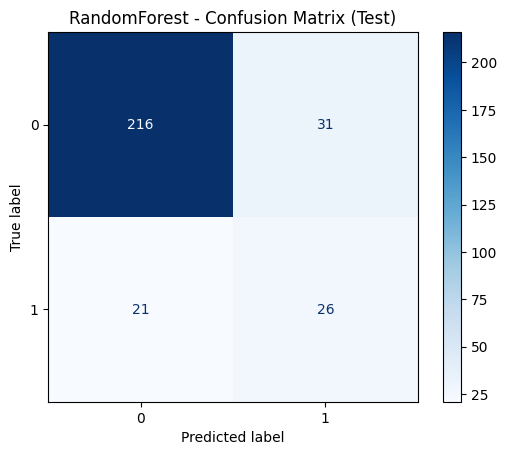

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
evaluate_model(rf_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "RandomForest")


=== GradientBoosting ===
Training Accuracy: 0.9792
Testing Accuracy:  0.8673

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.63      0.40      0.49        47

    accuracy                           0.87       294
   macro avg       0.76      0.68      0.71       294
weighted avg       0.85      0.87      0.85       294



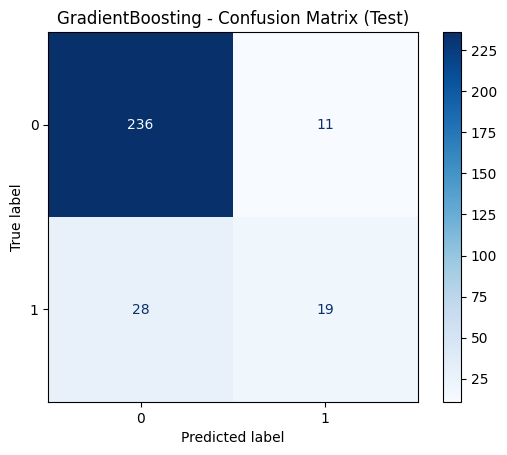

In [40]:
gb_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
evaluate_model(gb_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "GradientBoosting")


=== XGBoost ===
Training Accuracy: 0.9721
Testing Accuracy:  0.8537

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       247
           1       0.57      0.34      0.43        47

    accuracy                           0.85       294
   macro avg       0.73      0.65      0.67       294
weighted avg       0.83      0.85      0.84       294



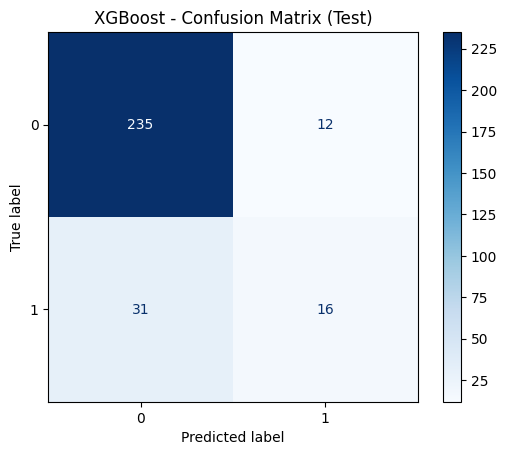

In [41]:
xgb_model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb_model, X_train_bal, y_train_bal, X_test_scaled, y_test, "XGBoost")

In [42]:
import pickle
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Optional: If you haven't defined a helper function yet, define it here:
def evaluate_and_collect_metrics(model, model_name, X_train, y_train, X_test, y_test):
    """ Train the model, return training & test accuracy plus a classification report for test set."""
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test,  y_test_pred)
    
    # You can store additional metrics, e.g. F1 or recall if needed.
    # Here we'll just store accuracies for simplicity.
    
    print(f"\n=== {model_name} ===")
    print("Training Accuracy:", round(train_acc, 4))
    print("Testing Accuracy: ", round(test_acc, 4))
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))
    
    return train_acc, test_acc

# Example models to compare:
models_to_try = {
    "LogisticRegression": LogisticRegression(max_iter=2000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42, 
                             use_label_encoder=False, eval_metric='logloss')
}

# We'll store results in a list of dicts
results = []
for name, model in models_to_try.items():
    train_acc, test_acc = evaluate_and_collect_metrics(
        model, name, 
        X_train_bal, y_train_bal,  # If you're using SMOTE balanced data
        X_test_scaled, y_test      # or X_test if not scaled or balanced
    )
    results.append({
        "Model": name,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": test_acc,
        "Estimator": model  # store the fitted model object if you want
    })


=== LogisticRegression ===
Training Accuracy: 0.7764
Testing Accuracy:  0.7789

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       247
           1       0.40      0.72      0.51        47

    accuracy                           0.78       294
   macro avg       0.67      0.76      0.68       294
weighted avg       0.85      0.78      0.80       294


=== KNN ===
Training Accuracy: 0.8737
Testing Accuracy:  0.6497

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.64      0.76       247
           1       0.27      0.68      0.38        47

    accuracy                           0.65       294
   macro avg       0.59      0.66      0.57       294
weighted avg       0.81      0.65      0.70       294


=== SVM ===
Training Accuracy: 0.9741
Testing Accuracy:  0.8129

Classification Report (Test):
              precision    recall  f1-score

In [43]:
model_results_df = pd.DataFrame(results)
model_results_df.drop(columns=["Estimator"], inplace=True)  # Just for plotting; remove if you want.

model_results_df

Model  Train_Accuracy  Test_Accuracy
0  LogisticRegression        0.776369       0.778912
1                 KNN        0.873732       0.649660
2                 SVM        0.974138       0.812925
3          GaussianNB        0.703347       0.612245
4        DecisionTree        0.867140       0.785714
5        RandomForest        0.914300       0.823129
6    GradientBoosting        0.979209       0.867347
7             XGBoost        0.972110       0.853741

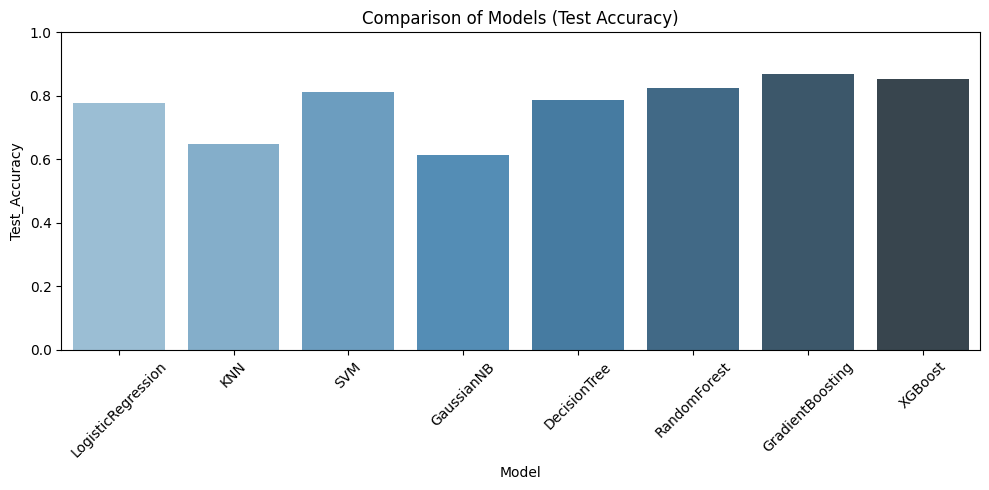

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Test_Accuracy", data=model_results_df, palette="Blues_d")
plt.title("Comparison of Models (Test Accuracy)")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # accuracy range
plt.tight_layout()
plt.show()

In [45]:
model_results_sorted = model_results_df.sort_values(by="Test_Accuracy", ascending=False)
print("Sorted by Test_Accuracy:\n", model_results_sorted)

best_model_name = model_results_sorted.iloc[0]["Model"]
best_test_acc   = model_results_sorted.iloc[0]["Test_Accuracy"]

print(f"\nBest Model: {best_model_name} with Test Accuracy = {best_test_acc:.4f}")

Sorted by Test_Accuracy:
                 Model  Train_Accuracy  Test_Accuracy
6    GradientBoosting        0.979209       0.867347
7             XGBoost        0.972110       0.853741
5        RandomForest        0.914300       0.823129
2                 SVM        0.974138       0.812925
4        DecisionTree        0.867140       0.785714
0  LogisticRegression        0.776369       0.778912
1                 KNN        0.873732       0.649660
3          GaussianNB        0.703347       0.612245

Best Model: GradientBoosting with Test Accuracy = 0.8673


In [46]:
import pickle

model_dict = { d["Model"]: d["Estimator"] for d in results }

best_estimator = model_dict[best_model_name]
print("Selected best estimator:", best_estimator)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_estimator, f)

print("Best model saved as best_model.pkl")

Selected best estimator: GradientBoostingClassifier(n_estimators=150, random_state=42)
Best model saved as best_model.pkl
